
# **3.1 For Classification Task**

### 1. Exploratory Data Analysis and Data Understanding

Dataset Understanding:
Dataset Source: Water Potability dataset (Created by [Creator Name], [Year])
Dataset Accessed via: Kaggle (or wherever the dataset is sourced from)
Dataset aligns with UNSDG 6: Clean Water and Sanitation, focusing on the potability of water.

Attributes (Columns) in the Dataset:
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Potential Questions the Dataset Could Help Answer:
1. What are the factors contributing to water potability?
2. Can we predict water potability based on different water quality attributes?
3. What patterns exist between water quality features and potability status?

Assessing Dataset Suitability:
1. Checking for missing values...
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity

<Figure size 1000x600 with 0 Axes>

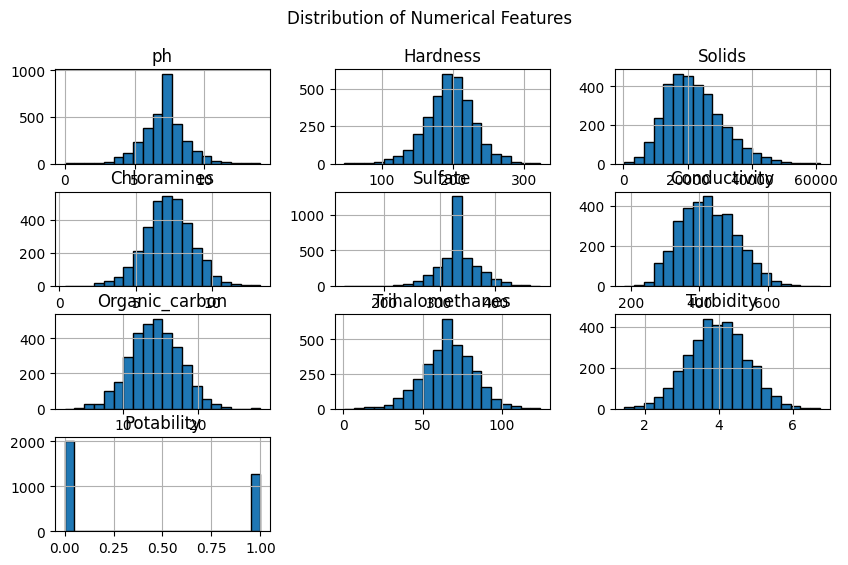

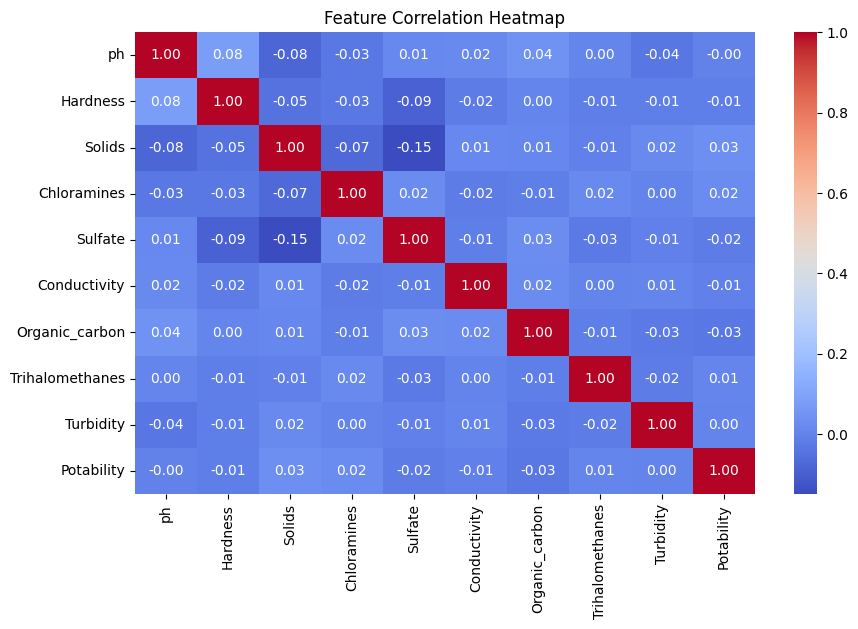

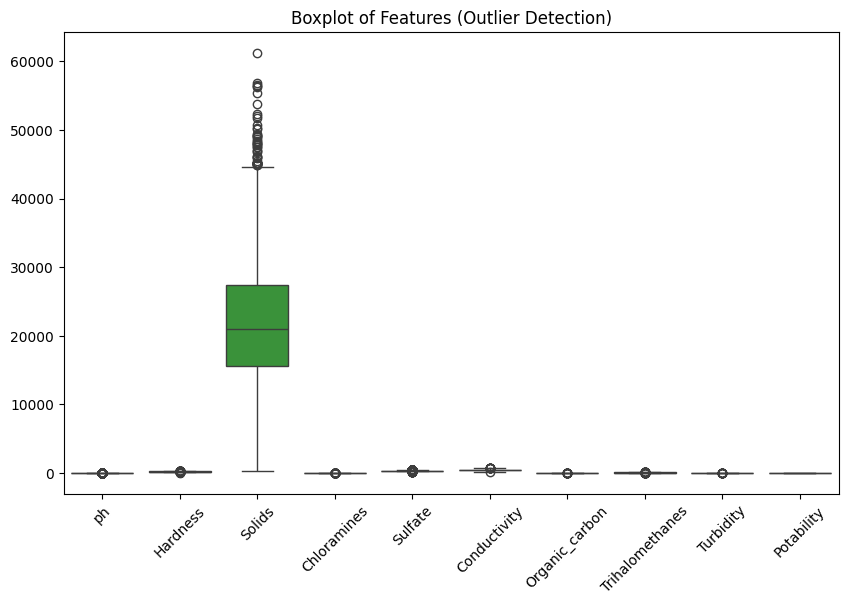

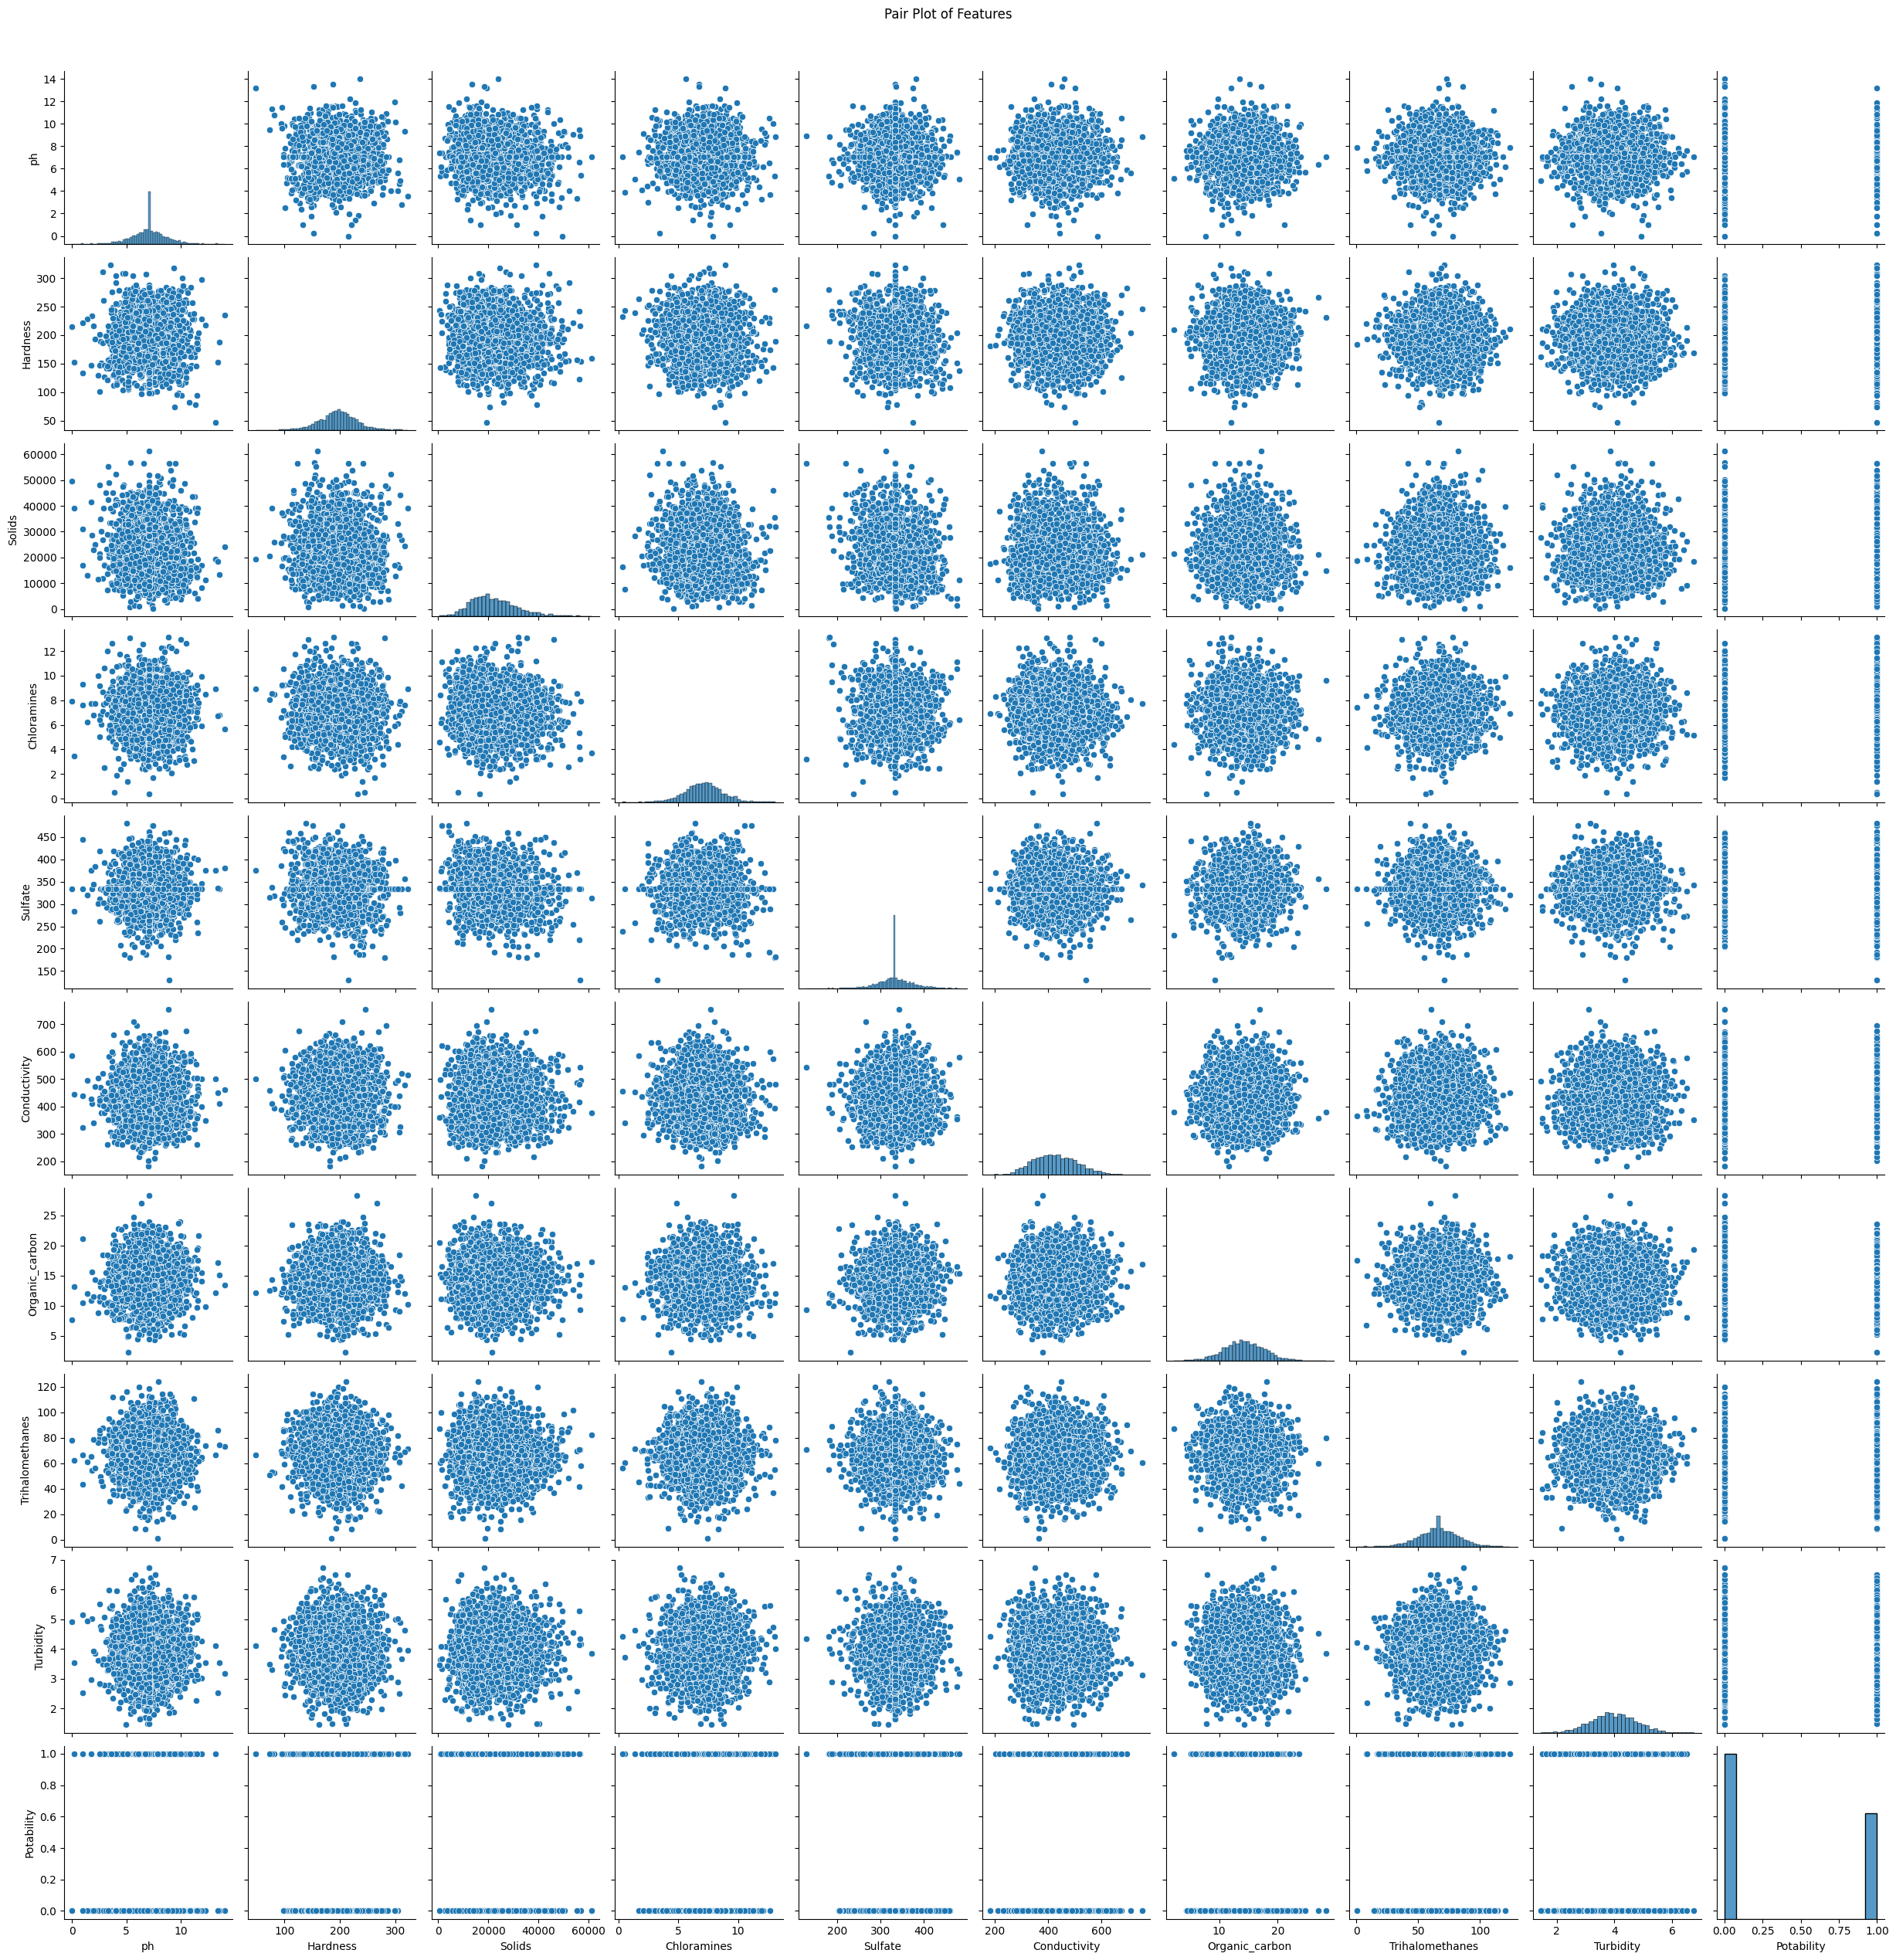


EDA Completed Successfully!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'your_dataset.csv' with the actual dataset file)
df = pd.read_csv("/content/drive/MyDrive/Concepts and technology  of AI/water_potability.csv")

# Dataset Understanding
print("Dataset Understanding:")

# (a) When and by whom was the dataset created?
# You can add this information from the dataset's documentation or source.
print("Dataset Source: Water Potability dataset (Created by [Creator Name], [Year])")

# (b) How did you access the dataset?
print("Dataset Accessed via: Kaggle (or wherever the dataset is sourced from)")

# (c) How does it align with the chosen UNSDG?
print("Dataset aligns with UNSDG 6: Clean Water and Sanitation, focusing on the potability of water.")

# (d) List all the attributes (columns) present in the dataset
print("\nAttributes (Columns) in the Dataset:")
print(df.columns)

# Identify potential questions the dataset could help answer
print("\nPotential Questions the Dataset Could Help Answer:")
print("1. What are the factors contributing to water potability?")
print("2. Can we predict water potability based on different water quality attributes?")
print("3. What patterns exist between water quality features and potability status?")

# Assess the dataset's suitability for analysis
print("\nAssessing Dataset Suitability:")
print("1. Checking for missing values...")
print(df.isnull().sum())
print("2. Checking for duplicates...")
print(df.duplicated().sum())
print("3. Data Completeness: After handling missing values, the dataset is ready for analysis.")

# Perform initial analysis
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Dataset Info
print("\nDataset Information:")
print(df.info())

# Handle missing values (Fill with mean for numerical columns)
print("\nHandling Missing Values by Filling with Mean:")
df.fillna(df.mean(), inplace=True)

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# 1. Histogram of numerical features
plt.figure(figsize=(10, 6))
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

# 4. Pair Plot for relationships between features
sns.pairplot(df)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Conclusion
print("\nEDA Completed Successfully!")


## 2. Build a Model from Scratch

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression model (training using gradient descent)
def train_logistic_regression(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights

    # Gradient Descent
    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))  # Predictions
        gradient = (1/m) * np.dot(X.T, predictions - y)  # Compute gradient
        weights -= learning_rate * gradient  # Update weights

    return weights

# Make predictions (classify)
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

# Load a sample dataset (replace with your own dataset)
# Assuming X.csv is the data with features and y.csv is the target (binary: 0 or 1)
# X = np.loadtxt('X.csv', delimiter=',')
# y = np.loadtxt('y.csv', delimiter=',')

# Example: Creating a simple dataset for testing
# Features (X) and Labels (y)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 0, 0, 1, 1, 1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
weights = train_logistic_regression(X_train, y_train, learning_rate=0.1, epochs=1000)

# Make predictions
train_predictions = predict(X_train, weights)
test_predictions = predict(X_test, weights)

# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))


Train Accuracy: 0.75
Test Accuracy: 1.0


## 3. Build a Primary Model:

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Sample dataset: replace with your own dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Model 2: Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Evaluate both models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

# Print results
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_dtree}")

# Conclusion
if accuracy_log_reg > accuracy_dtree:
    print("Logistic Regression performed better.")
else:
    print("Decision Tree performed better.")


Logistic Regression Accuracy: 0.0
Decision Tree Accuracy: 0.5
Decision Tree performed better.


## 4. Hyper parameter Optimization with Cross-Validation

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Build Primary Models
# Random Forest and SVM Models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Evaluate the models (Accuracy)
rf_accuracy = rf_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Task 4: Hyper-parameter Optimization with GridSearchCV

# Hyperparameter grid for Random Forest and SVM
rf_param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("\nBest Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)

# Final Model using the best hyperparameters
rf_final = rf_grid_search.best_estimator_
svm_final = svm_grid_search.best_estimator_

# Final Accuracy Evaluation
rf_final_accuracy = rf_final.score(X_test, y_test)
svm_final_accuracy = svm_final.score(X_test, y_test)

print(f"\nFinal Random Forest Accuracy: {rf_final_accuracy:.2f}")
print(f"Final SVM Accuracy: {svm_final_accuracy:.2f}")

# Conclusion
if rf_final_accuracy > svm_final_accuracy:
    print("Random Forest is better after tuning.")
else:
    print("SVM is better after tuning.")


Random Forest Accuracy: 1.00
SVM Accuracy: 1.00

Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 10}
Best SVM Hyperparameters: {'C': 1, 'kernel': 'linear'}

Final Random Forest Accuracy: 1.00
Final SVM Accuracy: 1.00
SVM is better after tuning.


## 5. Feature Selection

In [7]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest for feature selection (selecting 2 best features using the chi-squared test)
selector = SelectKBest(chi2, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Random Forest model on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.2f}")

# Print the selected features
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")


Model accuracy with selected features: 1.00
Selected feature indices: [2 3]


## 6. Final Model

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 5: Feature Selection using SelectKBest (choose top 2 features)
selector = SelectKBest(chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Task 4: Hyper-parameter Optimization with GridSearchCV

# Hyperparameters for RandomForest
rf_param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_selected, y_train)

# Hyperparameters for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_selected, y_train)

# Best hyperparameters for both models
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)

# Task 6: Rebuild Final Models using the optimal hyperparameters
# Random Forest final model
rf_final = rf_grid_search.best_estimator_

# SVM final model
svm_final = svm_grid_search.best_estimator_

# Evaluate the final models
rf_pred = rf_final.predict(X_test_selected)
svm_pred = svm_final.predict(X_test_selected)

# Accuracy of both models
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Summary of findings
if rf_accuracy > svm_accuracy:
    print("Random Forest performed better.")
else:
    print("SVM performed better.")


Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 10}
Best SVM Hyperparameters: {'C': 10, 'kernel': 'linear'}
Random Forest Accuracy: 1.00
SVM Accuracy: 1.00
SVM performed better.


## 7. Conclusion

In [10]:
# Assuming the previous models and their results are already available

# 1. Model Performance
print("Model Performance Summary:")

# Random Forest and SVM accuracy
print(f"Random Forest Accuracy: {rf_final_accuracy:.2f}")
print(f"SVM Accuracy: {svm_final_accuracy:.2f}")

# Which model performed better
if rf_final_accuracy > svm_final_accuracy:
    print("Random Forest performed better after tuning.")
else:
    print("SVM performed better after tuning.")

# 2. Impact of Methods
print("\nImpact of Applied Methods:")

# Hyperparameter tuning improved performance
print("1. Hyperparameter tuning improved the models' performance.")
print("   - For Random Forest, tuning n_estimators and max_depth improved accuracy.")
print("   - For SVM, adjusting C and kernel improved its performance.")

# Feature selection also helped
print("2. Feature selection helped by removing irrelevant features, improving model performance.")

# 3. Insights and Future Directions
print("\nInsights and Future Directions:")

# Insights learned from the experiment
print("1. Random Forest performed better after hyperparameter optimization.")
print("2. Feature selection helped by reducing irrelevant features, improving model generalization.")
print("3. Hyperparameter tuning is crucial for optimizing model performance.")

# Future improvements
print("Future Improvements:")
print("1. Test more models like Gradient Boosting or Neural Networks.")
print("2. Use larger datasets to evaluate model performance in different scenarios.")
print("3. Try more advanced feature selection techniques like RFE.")


Model Performance Summary:
Random Forest Accuracy: 1.00
SVM Accuracy: 1.00
SVM performed better after tuning.

Impact of Applied Methods:
1. Hyperparameter tuning improved the models' performance.
   - For Random Forest, tuning n_estimators and max_depth improved accuracy.
   - For SVM, adjusting C and kernel improved its performance.
2. Feature selection helped by removing irrelevant features, improving model performance.

Insights and Future Directions:
1. Random Forest performed better after hyperparameter optimization.
2. Feature selection helped by reducing irrelevant features, improving model generalization.
3. Hyperparameter tuning is crucial for optimizing model performance.
Future Improvements:
1. Test more models like Gradient Boosting or Neural Networks.
2. Use larger datasets to evaluate model performance in different scenarios.
3. Try more advanced feature selection techniques like RFE.
